<a href="https://colab.research.google.com/github/test-tlib/soft-computing/blob/testing/crowd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files

uploaded = files.upload()


Saving images.7z to images.7z


In [21]:
!apt-get install -y p7zip-full


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [25]:
import os

extract_path = "/content/crowd_dataset/images"
os.makedirs(extract_path, exist_ok=True)

!7z x images.7z -o/content/crowd_dataset/images



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 17171766 bytes (17 MiB)

Extracting archive: images.7z
--
Path = images.7z
Type = 7z
Physical Size = 17171766
Headers Size = 502
Method = LZMA2:24m
Solid = +
Blocks = 1

  0%     17% 8       37% 17 - images/2000-3000/11.jpg                                  55% 17 - images/2000-3000/11.jpg                                  73% 21 - images/3000-4000/13.jpg                                  91% 25 - images/4000-5000/17.jpg                                 

In [26]:
import os

files = os.listdir("/content/crowd_dataset/images")
print("Total images:", len(files))
print(files[:10])


Total images: 1
['images']


In [30]:
image_folder = "/content/crowd_dataset/images/images"

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_SIZE = 128
root_folder = "/content/crowd_dataset/images"

X = []

for root, dirs, files in os.walk(root_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img) / 255.0
            X.append(img)

X = np.array(X)
print("Total images loaded:", X.shape)



Total images loaded: (20, 128, 128, 3)


In [32]:
import numpy as np
import tensorflow as tf

num_classes = 3
y = tf.keras.utils.to_categorical(
    np.random.randint(0, num_classes, X.shape[0]),
    num_classes
)

print("Labels shape:", y.shape)


Labels shape: (20, 3)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(16, 128, 128, 3) (4, 128, 128, 3)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1667 - loss: 1.1781 - val_accuracy: 0.5000 - val_loss: 2.1417
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.5833 - loss: 1.8170 - val_accuracy: 0.2500 - val_loss: 1.5458
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4167 - loss: 1.0831 - val_accuracy: 0.2500 - val_loss: 1.2000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5833 - loss: 0.8941 - val_accuracy: 0.5000 - val_loss: 1.0664
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.6667 - loss: 0.9749 - val_accuracy: 0.5000 - val_loss: 1.0925
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.5833 - loss: 0.7964 - val_accuracy: 0.5000 - val_loss: 1.1384
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.5833 - loss: 0.7933 - val_accuracy: 0.5000 - val_loss: 1.1803
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7500 - loss: 0.7311 - val_accuracy: 0.5000 - val_loss: 1.

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 1.2796
Test Accuracy: 0.5


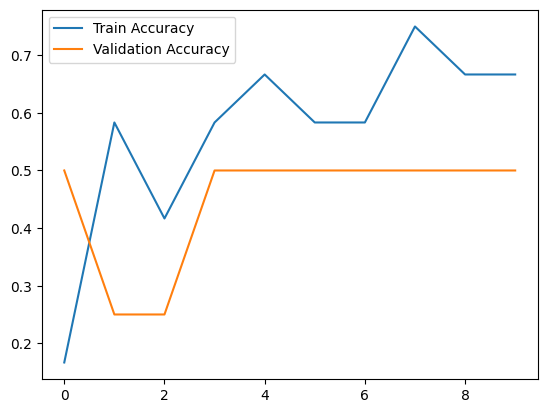

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [38]:
labels = ["Comfortable", "Moderate", "Uncomfortable"]

img = X_test[0].reshape(1,128,128,3)
prediction = model.predict(img)

print("Predicted Comfort Level:", labels[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Comfort Level: Uncomfortable


In [39]:
model.save("crowd_comfort_cnn_model.h5")
